In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load your dataset
data = pd.read_csv("C:/Users/sanath/Desktop/python/IPL/IPLData.csv")

In [5]:
data.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

# Cleaning The Data

In the above data, the players can be initially segragated based on following parameters

1.Capped-Batters, Bowlers, Allrounders, Wicket Keeper

2.Uncapped-Batters, Bowlers, Allrounders, Wicket keepers

The uncapped players are playing the IPL for the first time, or relavant data isn't available therefore we have used their domestic T20 performances and 120 international performances

In [12]:
#segregating Data Capped Batters

#we have kept the batting parameters to restrict the analysis for batter specific tendencies. 

batters = data.loc[(data["Player_Type"] == "Batter")] 

batters_new = batters.loc[(batters["Capped"] == 1)]

Capped_Batters = batters_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate']]

In [13]:
Capped_Batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [21]:
#segregating Data Capped Bowlers

#we have kept the bowling parameters to restrict the analysis for bowler specific tendencies. 

bowlers = data.loc[(data["Player_Type"] == "Bowler ")] 

bowlers_new = bowlers.loc[(bowlers["Capped"] == 1)]

Capped_Bowlers = bowlers_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Wickets',
                              'Bowling_average',
                              'Economy',
                              'Bowling_Strike_Rate']]

In [22]:
Capped_Bowlers.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44


In [24]:
#segregating Data Capped Keepers 

Keepers = data.loc[(data["Player_Type"] == "Keeper")] 

Keepers_new = Keepers.loc[(Keepers["Capped"] == 1)]

Capped_Keepers = Keepers_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate',
                              'Catches',
                              'Run_outs',
                              'Stumps']]

In [25]:
Capped_Keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [26]:
#segregating Data Capped Allrounders 

Allrounders = data.loc[(data["Player_Type"] == "Allrounder")] 

Allrounders_new = Allrounders.loc[(Allrounders["Capped"] == 1)]

Capped_Allrounders = Allrounders_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate',
                              'Wickets',
                              'Bowling_average',
                              'Economy',
                              'Bowling_Strike_Rate']]

In [27]:
Capped_Allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


In [28]:
#Cleaning the data by making the null or NAN values 0.

Capped_Batters = Capped_Batters.fillna(0)

Capped_Bowlers = Capped_Bowlers.fillna(0)

Capped_Allrounders = Capped_Allrounders.fillna(0)

Capped_Keepers = Capped_Keepers.fillna(0)

In [30]:
#checking null values in the data

print(Capped_Batters.isna().sum())

print(Capped_Bowlers.isna().sum())

print(Capped_Allrounders.isna().sum())

print(Capped_Keepers.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64


In [33]:
#Analyzing the Batters Data

#Here we have narrowed our analysis to batters who have a batting average more the 32.0 

top_batters = Capped_Batters.loc[(Capped_Batters["Average"] >= 32.0)]

#Sorting the data in descending order with respect to each parameter

top_batters_average = top_batters.sort_values('Average', ascending=False)

top_batters_strike_rate= top_batters.sort_values('Strike_Rate', ascending=False)

top_batters_runs = top_batters.sort_values('Runs', ascending=False)

top_batters_matches = top_batters.sort_values('Matches_Played', ascending=False)

In [34]:
top_batters_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


In [35]:
top_batters_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [37]:
top_batters_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [38]:
top_batters_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [39]:
top_batters

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [40]:
# Calculate the impact for each batsman
top_batters['Impact'] = top_batters['Runs'] * top_batters['Average'] * (top_batters['Strike_Rate'] / 100)

# Sort the DataFrame by the 'Impact' column in descending order
top_batters = top_batters.sort_values('Impact', ascending=False)

# Select the top 5 impactful batsmen
top_5_impactful_batsmen = top_batters.head(5)

# Display the top 5 impactful batsmen
print(top_5_impactful_batsmen[['Player Name', 'Team', 'Nationality', 'Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Impact']])


        Player Name       Team Nationality  Matches_Played    Runs  Average  \
19    David Warner       Delhi    Overseas           150.0  5449.0    41.60   
208     Virat Kohli  Bangalore      Indian           207.0  6283.0    37.40   
0    Shikhar Dhawan     Punjab      Indian           192.0  5783.0    34.63   
212       KL Rahul     Lucknow      Indian            94.0  3273.0    47.43   
2    Faf Du Plessis  Bangalore    Overseas           100.0  2935.0    34.94   

     Strike_Rate         Impact  
19        139.97  317281.756480  
208       129.95  305361.967900  
0         126.60  253535.857140  
212       136.38  211714.116282  
2         131.09  134431.353010  


C:\Users\sanath\AppData\Local\Temp\ipykernel_10800\3599343926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batters['Impact'] = top_batters['Runs'] * top_batters['Average'] * (top_batters['Strike_Rate'] / 100)


In [45]:
#Analyzing the Bowlers Data

#here we have narrowed our analysis based on the bowling averages of the players to be less than 24.0

top_bowlers = Capped_Bowlers.loc[(Capped_Bowlers["Bowling_average"] <= 24.0)]



top_bowlers_average = top_bowlers.sort_values('Bowling_average')

top_bowlers_strike_rate= top_bowlers.sort_values('Bowling_Strike_Rate')

top_bowlers_wickets = top_bowlers.sort_values('Wickets', ascending=False)

top_bowlers_economy = top_bowlers.sort_values('Economy')

top_bowlers_matches = top_bowlers.sort_values('Matches_Played', ascending=False)

In [46]:
top_bowlers

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50


In [47]:
top_bowlers_average

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23


In [48]:
top_bowlers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61


In [49]:
top_bowlers_wickets

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00


In [50]:
top_bowlers_economy

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67


In [51]:
top_bowlers_matches

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00


In [53]:
# Exclude players with Matches_Played less than 10
top_bowlers = top_bowlers[top_bowlers['Matches_Played'] >= 10]

# Calculate the impact score for each bowler
top_bowlers['Impact'] = top_bowlers['Wickets'] * (1 / top_bowlers['Bowling_average']) * (1 / top_bowlers['Economy'])

# Sort the bowlers by impact in descending order
top_bowlers_impact = top_bowlers.sort_values('Impact', ascending=False).head(5)

# Display the top 5 impactful bowlers
print(top_bowlers_impact[['Player Name', 'Team', 'Nationality', 'Matches_Played', 'Wickets', 'Bowling_average', 'Economy', 'Impact']])


             Player Name       Team Nationality  Matches_Played  Wickets  \
50     Yuzvendra Chahal   Rajasthan      Indian           114.0    139.0   
215       Jasprit Bumrah     Mumbai      Indian           106.0    130.0   
36        Kagiso Rabada      Punjab    Overseas            50.0     76.0   
103  Nathan Coulter-Nile  Rajasthan    Overseas            38.0     48.0   
214   Varun Chakravarthy    Kolkata      Indian            31.0     36.0   

     Bowling_average  Economy    Impact  
50             22.28     7.59  0.821974  
215            23.05     7.42  0.760096  
36             20.53     8.21  0.450901  
103            21.92     7.52  0.291194  
214            23.31     6.82  0.226452  


C:\Users\sanath\AppData\Local\Temp\ipykernel_10800\1130545997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bowlers['Impact'] = top_bowlers['Wickets'] * (1 / top_bowlers['Bowling_average']) * (1 / top_bowlers['Economy'])


In [57]:
#Analyzing the Allrounder Data

#We have narrowed our analysis by further segregating the allrounders based on strike rate equal to or more than 140

top_allrounders = Capped_Allrounders.loc[(Capped_Allrounders[ "Strike_Rate"] >= 148.0)]

top_allrounders_average = top_allrounders.sort_values('Average', ascending=False)

top_alrounders_strike_rate= top_allrounders.sort_values('Strike_Rate', ascending=False)

top_allrounders_runs = top_allrounders.sort_values('Runs', ascending=False)

top_allrounders_matches = top_allrounders.sort_values('Matches_Played', ascending=False)

top_allrounders_bowling_average = top_allrounders.sort_values('Bowling_average')

top_allrounders_bowling_strike_rate= top_allrounders.sort_values('Bowling_Strike_Rate') 
                                                            
top_allrounders_wickets = top_allrounders.sort_values('Wickets', ascending=False)

top_allrounders_economy = top_allrounders.sort_values('Economy')

top_allrounders_matches = top_allrounders.sort_values('Matches_Played', ascending=False)

In [58]:
top_allrounders

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60


In [59]:
top_allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00


In [60]:
top_alrounders_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00


In [61]:
top_allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00


In [62]:
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00


In [63]:
top_allrounders_bowling_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [64]:
top_allrounders_bowling_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [65]:
top_allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00


In [66]:
top_allrounders_economy

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69


In [67]:
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00


In [69]:
# Filter out allrounders with matches less than 10
top_allrounders_filtered = top_allrounders[top_allrounders['Matches_Played'] >= 10]

# Calculate an impact score for each allrounder
top_allrounders_filtered['Impact_Score'] = (top_allrounders_filtered['Runs'] + top_allrounders_filtered['Wickets']) / top_allrounders_filtered['Matches_Played']

# Sort the DataFrame by Impact Score in descending order
top_allrounders_sorted = top_allrounders_filtered.sort_values(by='Impact_Score', ascending=False)

# Select the top 5 impactful allrounders
top_5_allrounders = top_allrounders_sorted.head(5)

# Display the top 5 impactful allrounders
print("Top 5 Impactful Allrounders:")
print(top_5_allrounders[['Player Name', 'Team', 'Matches_Played', 'Runs', 'Wickets', 'Impact_Score']])


C:\Users\sanath\AppData\Local\Temp\ipykernel_10800\1620056612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_allrounders_filtered['Impact_Score'] = (top_allrounders_filtered['Runs'] + top_allrounders_filtered['Wickets']) / top_allrounders_filtered['Matches_Played']


Top 5 Impactful Allrounders:
         Player Name       Team  Matches_Played    Runs  Wickets  Impact_Score
204    Andre Russell    Kolkata            84.0  1700.0     72.0     21.095238
218     Glen Maxwell  Bangalore            97.0  2018.0     22.0     21.030928
233  Kieron Pollard      Mumbai           178.0  3268.0     65.0     18.724719
211    Hardik Pandya    Gujarat            92.0  1476.0     42.0     16.500000
195   Mohammad Nabi     Kolkata            17.0   180.0     13.0     11.352941


In [73]:
#Analyzing the Keepers Data

#we have narrowed our analysis down to keepers averaging more than 25.0

top_keepers= Capped_Keepers.loc[(Capped_Keepers["Average"] >= 25.0)] 

#Sorting the data in descending order with respect to each parameter.

top_Keepers_average = top_keepers.sort_values('Average', ascending=False)

top_Keepers_strike_rate= top_keepers.sort_values('Strike_Rate', ascending=False) 

top_Keepers_runs = top_keepers.sort_values('Runs', ascending=False)

top_Keepers_matches = top_keepers.sort_values('Matches_Played', ascending=False)

top_Keepers_catches = top_keepers.sort_values('Catches', ascending=False)

top_Keepers_runouts = top_keepers.sort_values('Run_outs', ascending=False)

top_Keepers_stumps = top_keepers.sort_values('Stumps', ascending=False)

In [74]:
top_keepers

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


In [75]:
top_Keepers_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [76]:
top_Keepers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [77]:
top_Keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [78]:
top_Keepers_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [79]:
top_Keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [80]:
top_Keepers_runouts

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [81]:
top_Keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


In [82]:
# Assuming you have a DataFrame named 'top_keepers' with the keeper data

# Filter out keepers with matches played less than 10
top_keepers = top_keepers[top_keepers['Matches_Played'] >= 10]

# Calculate a weighted score for each keeper
# You can assign weights to each parameter based on their importance
# For example, you can assign equal weights to all parameters
weight_average = 1
weight_strike_rate = 1
weight_runs = 1
weight_catches = 1
weight_run_outs = 1
weight_stumps = 1

top_keepers['Impact_Score'] = (
    weight_average * top_keepers['Average'] +
    weight_strike_rate * top_keepers['Strike_Rate'] +
    weight_runs * top_keepers['Runs'] +
    weight_catches * top_keepers['Catches'] +
    weight_run_outs * top_keepers['Run_outs'] +
    weight_stumps * top_keepers['Stumps']
)

# Sort the keepers by their impact score in descending order
top_impactful_keepers = top_keepers.sort_values(by='Impact_Score', ascending=False).head(5)

# Print the top 5 impactful keepers
print(top_impactful_keepers[['Player Name', 'Team', 'Nationality', 'Impact_Score']])


C:\Users\sanath\AppData\Local\Temp\ipykernel_10800\1674131805.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_keepers['Impact_Score'] = (


        Player Name       Team Nationality  Impact_Score
213        MS Dhoni    Chennai      Indian       5107.30
109  Dinesh Karthik  Bangalore      Indian       4370.50
106   Ambati Rayudu    Chennai      Indian       4144.90
209    Sanju Samson  Rajasthan      Indian       3308.43
206   Rishabh Pant       Delhi      Indian       2755.64


In [84]:

# Sample data for top 5 players in each category (replace with your actual data)
top_5_batsmen = {
    'Player Name': ['David Warner', 'Virat Kohli', 'Shikhar Dhawan', 'KL Rahul', 'Faf Du Plessis'],
    'Impact': [317281.76, 305361.97, 253535.86, 211714.12, 134431.35]
}

top_5_bowlers = {
    'Player Name': ['Yuzvendra Chahal', 'Jasprit Bumrah', 'Kagiso Rabada', 'Nathan Coulter-Nile', 'Varun Chakravarthy'],
    'Impact': [0.821974, 0.760096, 0.450901, 0.291194, 0.226452]
}

top_5_allrounders = {
    'Player Name': ['Andre Russell', 'Glen Maxwell', 'Kieron Pollard', 'Hardik Pandya', 'Mohammad Nabi'],
    'Impact_Score': [21.095238, 21.030928, 18.724719, 16.5, 11.352941]
}

top_5_keepers = {
    'Player Name': ['MS Dhoni', 'Dinesh Karthik', 'Ambati Rayudu', 'Sanju Samson', 'Rishabh Pant'],
    'Impact_Score': [5107.30, 4370.50, 4144.90, 3308.43, 2755.64]
}

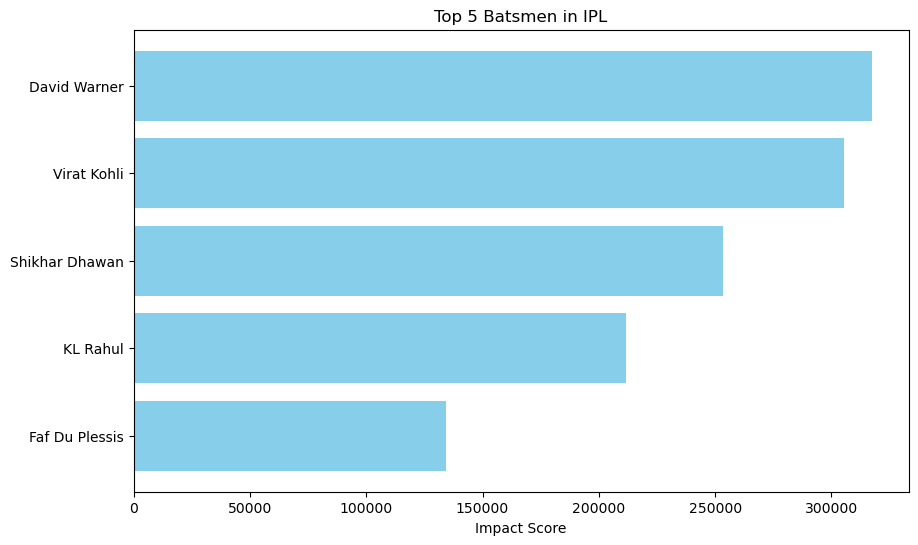

In [85]:
# Visualize the Top 5 Batsmen
plt.figure(figsize=(10, 6))
plt.barh(top_5_batsmen['Player Name'], top_5_batsmen['Impact'], color='skyblue')
plt.xlabel('Impact Score')
plt.title('Top 5 Batsmen in IPL')
plt.gca().invert_yaxis()
plt.show()


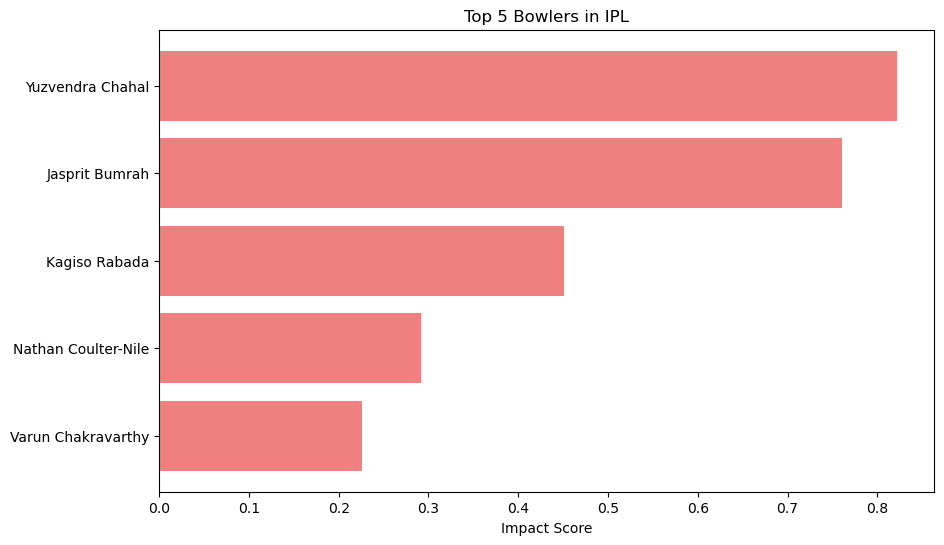

In [86]:
# Visualize the Top 5 Bowlers
plt.figure(figsize=(10, 6))
plt.barh(top_5_bowlers['Player Name'], top_5_bowlers['Impact'], color='lightcoral')
plt.xlabel('Impact Score')
plt.title('Top 5 Bowlers in IPL')
plt.gca().invert_yaxis()
plt.show()


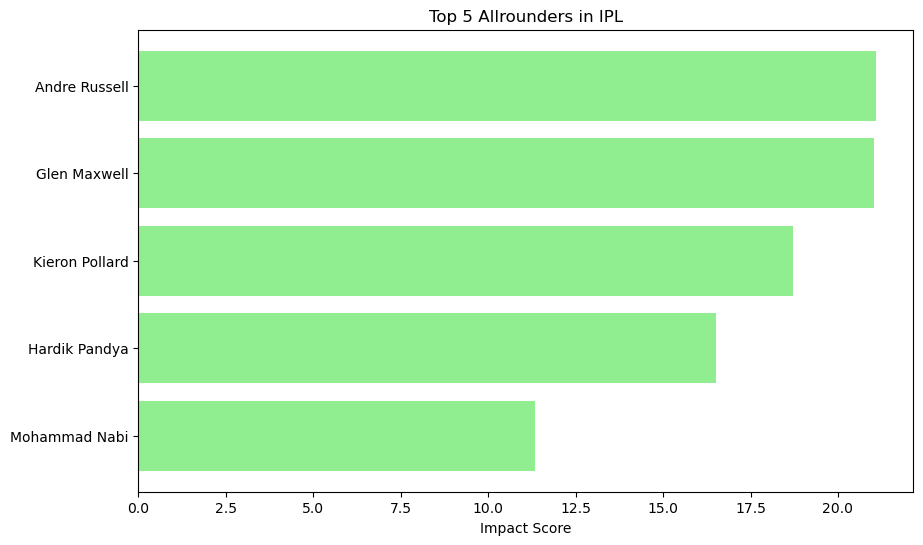

In [87]:
# Visualize the Top 5 Allrounders
plt.figure(figsize=(10, 6))
plt.barh(top_5_allrounders['Player Name'], top_5_allrounders['Impact_Score'], color='lightgreen')
plt.xlabel('Impact Score')
plt.title('Top 5 Allrounders in IPL')
plt.gca().invert_yaxis()
plt.show()

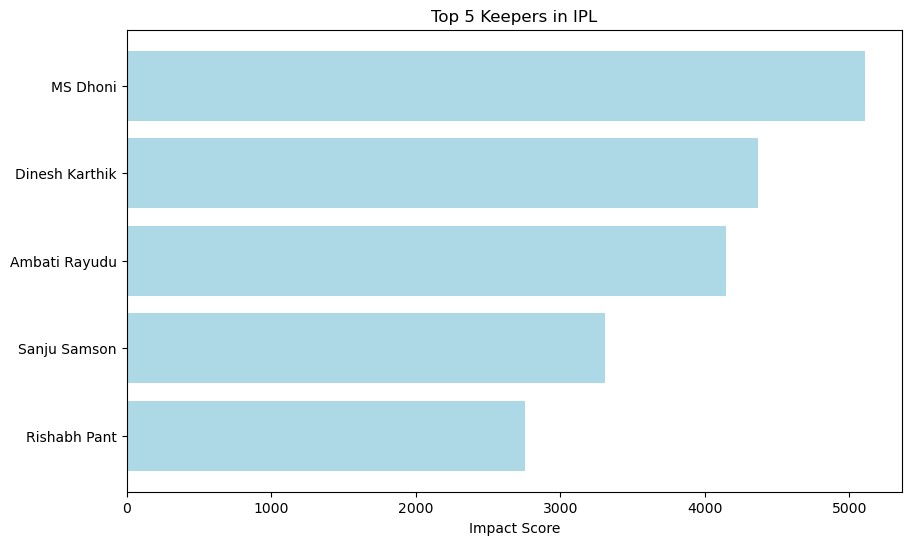

In [88]:
# Visualize the Top 5 Keepers
plt.figure(figsize=(10, 6))
plt.barh(top_5_keepers['Player Name'], top_5_keepers['Impact_Score'], color='lightblue')
plt.xlabel('Impact Score')
plt.title('Top 5 Keepers in IPL')
plt.gca().invert_yaxis()
plt.show()